In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import time 
import matplotlib.animation as ani
import matplotlib.dates as mdates
import datetime
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator
import pync

### load & first clean

In [2]:
dff = pd.read_excel('Data2.xlsx')
dff.replace(0, float('NaN'), inplace=True)
dff.dropna(inplace=True)

### Formula to add Stock/Bond Ratio to df

In [3]:
def Add_SBRatioRank(df, n):
# calculate and add Stock/Bond Ratio Rank
# first calculate all in a seperate 
    
    df['Stock_r'] = np.log(df['Stock_P']/df['Stock_P'].shift(20))
    df['Bond_r'] = np.log(df['Bond_P']/df['Bond_P'].shift(20))
    
    df['SB_Dif'] = df['Stock_r']-df['Bond_r']
    df['SB_Ratio'] = df['Stock_P']/df['Bond_P']
    df['SB_Ratio_Rank_0'] = (df['SB_Ratio']-df['SB_Ratio'].rolling(n).min())/(df['SB_Ratio'].rolling(n).max()-df['SB_Ratio'].rolling(n).min())
    df['SB_Ratio_Rank_1'] = (df['SB_Ratio']-df['SB_Ratio'].rolling(n+20).min())/(df['SB_Ratio'].rolling(n+20).max()-df['SB_Ratio'].rolling(n+20).min())
    df['SB_Ratio_Rank_2'] = (df['SB_Ratio']-df['SB_Ratio'].rolling(n-20).min())/(df['SB_Ratio'].rolling(n-20).max()-df['SB_Ratio'].rolling(n-20).min())
    df['SB_Ratio_Rank'] = (df['SB_Ratio_Rank_0']+df['SB_Ratio_Rank_1']+df['SB_Ratio_Rank_2'])/3
    
    return df

### Formula to add RiskPremium to df

In [4]:
def Add_RiskPremiumRank(df, n):
# calculate risk premium Rank

    df['Risk_Premium'] = (df['US10Y_Yield'])/(100*df['Earnings']/df['SPX_P'])
    df['Risk_Premium_Rank_0'] = (df['Risk_Premium']-df['Risk_Premium'].rolling(n).min())/(df['Risk_Premium'].rolling(n).max()-df['Risk_Premium'].rolling(n).min())
    df['Risk_Premium_Rank_1'] = (df['Risk_Premium']-df['Risk_Premium'].rolling(n+20).min())/(df['Risk_Premium'].rolling(n+20).max()-df['Risk_Premium'].rolling(n+20).min())
    df['Risk_Premium_Rank_2'] = (df['Risk_Premium']-df['Risk_Premium'].rolling(n-20).min())/(df['Risk_Premium'].rolling(n-20).max()-df['Risk_Premium'].rolling(n-20).min())
    df['Risk_Premium_Rank'] = (df['Risk_Premium_Rank_0']+df['Risk_Premium_Rank_1']+df['Risk_Premium_Rank_2'])/3
    return df

### Formula to Add Put/Call Impl Vol to df

In [5]:
def Add_PutCallVolRank(df, n):
# calculate Put/Call Implied Volatility Rank

    df['SPX_Impl_Spread_P-C_Rank_0'] = -1*(df['SPX_Impl_Spread_P-C']-df['SPX_Impl_Spread_P-C'].rolling(n).min())/(df['SPX_Impl_Spread_P-C'].rolling(n).max()-df['SPX_Impl_Spread_P-C'].rolling(n).min())+1
    df['SPX_Impl_Spread_P-C_Rank_1'] = -1*(df['SPX_Impl_Spread_P-C']-df['SPX_Impl_Spread_P-C'].rolling(n+20).min())/(df['SPX_Impl_Spread_P-C'].rolling(n+20).max()-df['SPX_Impl_Spread_P-C'].rolling(n+20).min())+1
    df['SPX_Impl_Spread_P-C_Rank_2'] = -1*(df['SPX_Impl_Spread_P-C']-df['SPX_Impl_Spread_P-C'].rolling(n-20).min())/(df['SPX_Impl_Spread_P-C'].rolling(n-20).max()-df['SPX_Impl_Spread_P-C'].rolling(n-20).min())+1
    df['SPX_Impl_Spread_P-C_Rank'] = (df['SPX_Impl_Spread_P-C_Rank_0']+df['SPX_Impl_Spread_P-C_Rank_1']+df['SPX_Impl_Spread_P-C_Rank_2'])/3
    
    return df


### Formula to add Vola Curve Slope Z Score to df

In [6]:
def Add_Vola_CurveRank(df,n):
# calculate Vola Curve Rank
    
    df['Vola_Slope_Rank_0'] = (df['Vola_Slope']-df['Vola_Slope'].rolling(n).min())/(df['Vola_Slope'].rolling(n).max()-df['Vola_Slope'].rolling(n).min())
    df['Vola_Slope_Rank_1'] = (df['Vola_Slope']-df['Vola_Slope'].rolling(n+20).min())/(df['Vola_Slope'].rolling(n+20).max()-df['Vola_Slope'].rolling(n+20).min())
    df['Vola_Slope_Rank_2'] = (df['Vola_Slope']-df['Vola_Slope'].rolling(n-20).min())/(df['Vola_Slope'].rolling(n-20).max()-df['Vola_Slope'].rolling(n-20).min())
    df['Vola_Slope_Rank'] = (df['Vola_Slope_Rank_0']+df['Vola_Slope_Rank_1']+df['Vola_Slope_Rank_2'])/3
    
    return df

In [7]:
def Add_SEKJPYRank(df, n):
    
    df['SEKJPY_Rank_0'] = (df['SEKJPY']-df['SEKJPY'].rolling(n).min())/(df['SEKJPY'].rolling(n).max()-df['SEKJPY'].rolling(n).min())
    df['SEKJPY_Rank_1'] = (df['SEKJPY']-df['SEKJPY'].rolling(n+20).min())/(df['SEKJPY'].rolling(n+20).max()-df['SEKJPY'].rolling(n+20).min())
    df['SEKJPY_Rank_2'] = (df['SEKJPY']-df['SEKJPY'].rolling(n-20).min())/(df['SEKJPY'].rolling(n-20).max()-df['SEKJPY'].rolling(n-20).min())
    df['SEKJPY_Rank'] = (df['SEKJPY_Rank_0']+df['SEKJPY_Rank_1']+df['SEKJPY_Rank_2'])/3
    
    
    return df

In [8]:
def Add_HLRank(df, n):
    
    df['High_Low'] = df['NY_HIGH']/df['NY_LOW']
    df['Low_Rank'] = -1*(np.log(df['NY_LOW'])-np.log(df['NY_LOW']).rolling(n).min())/(np.log(df['NY_LOW']).rolling(n).max()-np.log(df['NY_LOW']).rolling(n).min())+1
    df['High_Rank'] = (df['NY_HIGH']-df['NY_HIGH'].rolling(n).min())/(df['NY_HIGH'].rolling(n).max()-df['NY_HIGH'].rolling(n).min())
    df['High-Low'] = df['NY_HIGH']-df['NY_LOW']
    df['High_Low_Rank_0'] = (df['High-Low']-df['High-Low'].rolling(n).min())/(df['High-Low'].rolling(n).max()-df['High-Low'].rolling(n).min())
    df['High_Low_Rank_1'] = (df['High-Low']-df['High-Low'].rolling(n+20).min())/(df['High-Low'].rolling(n+20).max()-df['High-Low'].rolling(n+20).min())
    df['High_Low_Rank_2'] = (df['High-Low']-df['High-Low'].rolling(n-20).min())/(df['High-Low'].rolling(n-20).max()-df['High-Low'].rolling(n-20).min())
    df['High_Low_Rank'] = (df['High_Low_Rank_0'] +df['High_Low_Rank_1'] +df['High_Low_Rank_2'])/3
    
    
    return df

In [9]:
def MA(serIn, n):
    
    if n == 0:
        serOut = serIn
    else:
        serOut = serIn.rolling(n).mean()
    return serOut

In [10]:
def Rank(SerIn, n):
    
    SerOut = (SerIn-SerIn.rolling(n).min())/(SerIn.rolling(n).max()-SerIn.rolling(n).min())
    return SerOut

In [11]:
def do_Strat(dff, n1=150, n2=150, n3=140, n4=330, n5=80, n6=220, n7=210, a1=10, a2=10, a3=10, a4=10, a5=10, a6=10, a7=20, a=80, evaluate=True):
    
# do the strategy and chose 

# copy the dataframe to use 
    df = dff.copy()

# calculate future Returns
    df['1M nReturn'] = np.log(df['Stock_P'].shift(-21)/df['Stock_P'].shift(-1))
    df['3M nReturn'] = np.log(df['Stock_P'].shift(-61)/df['Stock_P'].shift(-1))
    df['6M nReturn'] = np.log(df['Stock_P'].shift(-121)/df['Stock_P'].shift(-1))
    df['Stock_MA'] = df.Stock_P.rolling(80).mean()

# calculate values 
    df = Add_SBRatioRank(df, n1)
    df = Add_RiskPremiumRank(df, n2)
    df = Add_PutCallVolRank(df, n3)
#     df = Add_HYCDSRank(df, 100)
    df = Add_Vola_CurveRank(df, n4)
#     df = Add_DollarRank(df, 100)
    df = Add_SEKJPYRank(df, n5)
    df = Add_HLRank(df, n6)
    
    
    df['SB_Ratio_Rank'] = MA(df['SB_Ratio_Rank'],a1)
    df['Risk_Premium_Rank'] = MA(df['Risk_Premium_Rank'], a2)
    df['Vola_Slope_Rank'] = MA(df['Vola_Slope_Rank'], a3) 
#     df['HY_CDS_Rank'] = MA(df['HY_CDS_Rank'], a4)
    df['SPX_Impl_Spread_P-C_Rank'] = MA(df['SPX_Impl_Spread_P-C_Rank'],a4)
    df['SEKJPY_Rank'] = MA(df['SEKJPY_Rank'], a5)
#     df['Dollar_Rank'] = MA(df['Dollar_Rank'], a6)
    df['High_Low_Rank'] = MA(df['High_Low_Rank'], a6)

# create Score
    df['Score'] = df['SB_Ratio_Rank']+df['Risk_Premium_Rank']+df['Vola_Slope_Rank']+df['SPX_Impl_Spread_P-C_Rank']+df['High_Low_Rank']+df['SEKJPY_Rank']
#     *1.2+df['HY_CDS_Rank'] +df['Dollar_Rank']
    df['Score_MA'] = df['Score'].rolling(n7).mean()
    df['Score_Z'] = (df['Score']-df['Score_MA'])/df['Score'].rolling(n7).std()
    df['Score_Rank'] = (df['Score']-df['Score'].rolling(n7).min())/(df['Score'].rolling(n7).max()-df['Score'].rolling(n7).min())
    df['Score_Rank'] = MA(df['Score_Rank'],a7)**2

# drop NaN    
    if evaluate:
        df.dropna(inplace=True)

    return df

In [ ]:
aaa = 0 
bbb = 1
ccc = 0

a1 = 12.5
b1 = 200
c1 = 240
d1 = 120
e1 = 320
f1 = 60
g1 = 240
h1 = 240

while (aaa <= 0.1) or (ccc>=20):
    ccc+=1
    print(f'ROUND {bbb}')
    print(f'SCORE {aaa}')
    result = pd.DataFrame(columns=['a7',
                                   'n1', 
                                   'n2',
                                   'n3',
                                   'n4',
                                   'n5',
                                   'n6',
                                   'n7',
                                   '# S',
                                   '6MS',
                                   '3MS',
                                   '# B',
                                   '6MSH', 
                                   '3MSH',
                                   'Last Sell' 
                                  ])

    s = 0

    for a in tqdm(np.linspace(a1-5, a1+5, 3), leave=True):
        for b in tqdm(np.linspace(b1-40, b1+40, 3)):
            for c in np.linspace(c1-40, c1+40, 3):
                for d in np.linspace(d1-40, d1+40, 3):
                    for e in np.linspace(e1-40, e1+40, 3):
                        for f in np.linspace(f1-20, f1+20, 3):
                            for g in np.linspace(g1-40, g1+40, 3):
                                for h in np.linspace(h1-40, h1+40, 3):

                                    df = do_Strat(dff, a7=int(a), n1=int(b), n2=int(c), n3=int(d), n4=int(e), n5=int(f), n6=int(g), n7=int(h))

                                    df['SELL'] = (df['Score_Rank'] > 0.8) & (df['Score_Rank'].shift(1) > df['Score_Rank']) & (df['Score_Rank'].shift(2) < df['Score_Rank'].shift(1))
                                    df['BUY'] = (df['Score_Rank'] < (0.2)) & (df['Score_Rank'].shift(1) < df['Score_Rank']) & (df['Score_Rank'].shift(2) > df['Score_Rank'].shift(1))


                                    dfff = do_Strat(dff, a7=int(a), n1=int(b), n2=int(c), n3=int(d), n4=int(e), n5=int(f), n6=int(g), n7=int(h), evaluate=False)


                                    dfff['SELL'] = (dfff['Score_Rank'] > 0.8) & (dfff['Score_Rank'].shift(1) > dfff['Score_Rank']) & (dfff['Score_Rank'].shift(2) < dfff['Score_Rank'].shift(1))

                                    p = dfff['SELL'][-200:].sum()

                                    i = df['SELL'].sum()
                                    j = ((df['6M nReturn']*df['SELL']*-1).sum())/(df['SELL'].sum())
                                    k = ((df['3M nReturn']*df['SELL']*-1).sum())/(df['SELL'].sum())

                                    l = df['BUY'].sum()
                                    m = round(len([num for num in (df['6M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['6M nReturn']*df['SELL']) if num != 0]),2)
    #                                 ((df['6M nReturn']*df['BUY']*1).sum())/(df['BUY'].sum())
                                    n = round(len([num for num in (df['3M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['3M nReturn']*df['SELL']) if num != 0]),2)
    #     ((df['3M nReturn']*df['BUY']*1).sum())/(df['BUY'].sum())
                                    o = df['SELL'][-200:].sum()


                                    result = result.append(pd.Series([0]), ignore_index=True)

                                    result.iloc[s, 0] = a
                                    result.iloc[s, 1] = b
                                    result.iloc[s, 2] = c
                                    result.iloc[s, 3] = d
                                    result.iloc[s, 4] = e
                                    result.iloc[s, 5] = f
                                    result.iloc[s, 6] = g
                                    result.iloc[s, 7] = h
                                    result.iloc[s, 8] = i
                                    result.iloc[s, 9] = j
                                    result.iloc[s, 10] = k
                                    result.iloc[s, 11] = l
                                    result.iloc[s, 12] = m
                                    result.iloc[s, 13] = n
                                    result.iloc[s, 14] = o
                                    result.iloc[s, 15] = p


                                    s+=1
    result['Score'] = (result["6MS"]*result["6MSH"]*result['# S'])-((result["6MSH"]==0).astype(int))
    aaa = result['Score'].max()
    bbb+=1
    a = result[(result['Score'] == result['Score'].max())]
    print(a)
    
    result.sort_values(by=['Score'], ascending=False, inplace=True)

    a1 = max([sum(result.iloc[1:10,0].to_list())/len(result.iloc[1:10,0].to_list()),15])
    b1 = max([sum(result.iloc[1:10,1].to_list())/len(result.iloc[1:10,1].to_list()),60])
    c1 = max([sum(result.iloc[1:10,2].to_list())/len(result.iloc[1:10,2].to_list()),60])
    d1 = max([sum(result.iloc[1:10,3].to_list())/len(result.iloc[1:10,3].to_list()),60])
    e1 = max([sum(result.iloc[1:10,4].to_list())/len(result.iloc[1:10,4].to_list()),60])
    f1 = max([sum(result.iloc[1:10,5].to_list())/len(result.iloc[1:10,5].to_list()),60])
    g1 = max([sum(result.iloc[1:10,6].to_list())/len(result.iloc[1:10,6].to_list()),60])
    h1 = max([sum(result.iloc[1:10,7].to_list())/len(result.iloc[1:10,7].to_list()),60])

pync.notify("Its done with {aaa}")

  0%|          | 0/3 [00:00<?, ?it/s]

ROUND 1
SCORE 0



  0%|          | 0/3 [00:00<?, ?it/s]

        a7   n1   n2   n3   n4  n5   n6   n7 # S        6MS      3MS # B 6MSH  \
4831  17.5  160  240  160  320  80  280  240   5  0.0127692  0.06687  24  0.8   

     3MSH Last Sell    0      Score  
4831  0.8         0  7.0  0.0510769  
ROUND 2
SCORE 0.05107686650012562



  0%|          | 0/3 [00:00<?, ?it/s]

        a7       n1       n2       n3   n4  n5       n6       n7 # S  \
2561  17.5  133.333  248.889  124.444  320  80  266.667  302.222   4   

            6MS        3MS # B 6MSH 3MSH Last Sell    0      Score  
2561  0.0160065  0.0937153  23    1    1         0  5.0  0.0640259  
ROUND 3
SCORE 0.06402586153667862



  0%|          | 0/3 [00:00<?, ?it/s]

        a7       n1       n2       n3       n4       n5       n6       n7 # S  \
4250  17.5  173.333  257.778  142.222  337.778  77.7778  222.222  311.111   5   

             6MS        3MS # B 6MSH 3MSH Last Sell    0      Score  
4250  0.00889781  0.0593576  20  0.8  0.8         1  6.0  0.0355912  
ROUND 4
SCORE 0.03559122636179442



  0%|          | 0/3 [00:00<?, ?it/s]

        a7       n1       n2       n3       n4       n5       n6       n7 # S  \
3984  17.5  173.333  217.778  137.778  311.111  75.5556  297.778  253.333   5   

            6MS        3MS # B 6MSH 3MSH Last Sell    0      Score  
3984  0.0180328  0.0539338  25  0.8  0.8         0  5.0  0.0721311  
ROUND 5
SCORE 0.07213113167673357



  0%|          | 0/3 [00:00<?, ?it/s]

        a7   n1       n2       n3       n4  n5       n6       n7 # S  \
3790  17.5  200  155.556  137.778  413.333  80  226.667  328.889   5   

             6MS        3MS # B 6MSH 3MSH Last Sell    0      Score  
3790  0.00889781  0.0593576  23  0.8  0.8         1  5.0  0.0355912  
ROUND 6
SCORE 0.03559122636179442



  0%|          | 0/3 [00:00<?, ?it/s]

          a7       n1   n2       n3       n4  n5       n6       n7 # S  \
738  11.3889  177.778  120  84.4444  373.333  80  213.333  293.333   7   

            6MS        3MS # B  6MSH  3MSH Last Sell    0      Score  
738  0.00736061  0.0719685  32  0.71  0.57         0  5.0  0.0365823  
ROUND 7
SCORE 0.03658225320669362



  0%|          | 0/3 [00:00<?, ?it/s]

    a7       n1       n2       n3       n4       n5       n6       n7 # S  \
16  10  146.667  111.111  88.8889  391.111  75.5556  288.889  324.444   9   

           6MS        3MS # B  6MSH  3MSH Last Sell    0      Score  
16  0.00727813  0.0743903  29  0.78  0.78         0  6.0  0.0510925  
ROUND 8
SCORE 0.0510924881455587



  0%|          | 0/3 [00:00<?, ?it/s]

          a7       n1       n2       n3       n4       n5       n6       n7  \
328  10.5556  142.222  137.778  93.3333  391.111  62.2222  253.333  333.333   

    # S         6MS        3MS # B  6MSH  3MSH Last Sell    0      Score  
328   8  0.00893877  0.0678442  32  0.62  0.75         0  6.0  0.0443363  
ROUND 9
SCORE 0.044336313939150024



  0%|          | 0/3 [00:00<?, ?it/s]

      a7       n1       n2       n3       n4       n5       n6       n7 # S  \
6366  20  208.889  164.444  48.8889  435.556  88.8889  275.556  302.222   6   

             6MS        3MS # B  6MSH  3MSH Last Sell    0      Score  
6366  0.00900329  0.0545137  26  0.83  0.67         1  5.0  0.0448364  
ROUND 10
SCORE 0.04483635964368445



  0%|          | 0/3 [00:00<?, ?it/s]

In [27]:


sum(result.iloc[1:5,0].to_list())/len(result.iloc[1:5,0].to_list())

10.0

          6-Month Return

6M Sell Return is 0.6% on average from 8 signals
Hit-rate: 0.62

6M Buy Return is 12.0% on average from 7 signals
Hit-rate: 1.0

The Average 6M Return is 6.8%



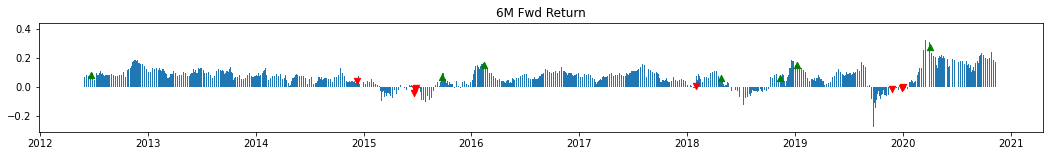

          --------------------

          3-Month Return

3M Sell Return is 8.3% on average from 8 signals
Hit-rate: 0.88

3M Buy Return is 8.7% on average from 7 signals
Hit-rate: 0.86


The Average 3M Return is 3.4%



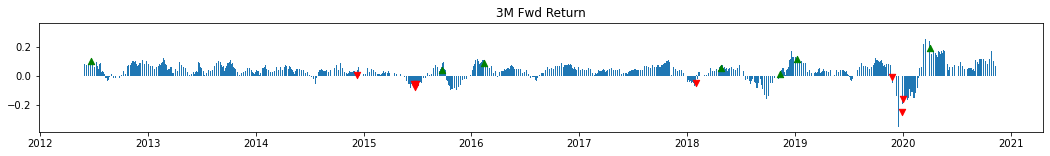

          --------------------

          3-Month Return

1M Sell Return is -0.2% on average from 8 signals
Hit-rate: 0.5

3M Buy Return is 3.9% on average from 7 signals
Hit-rate: 0.57


The Average 3M Return is 1.1%



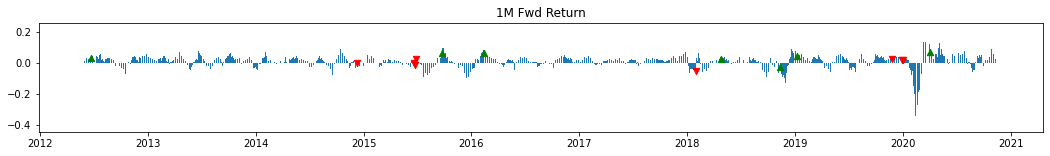

          --------------------



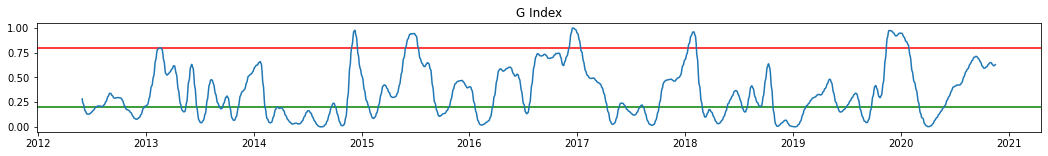

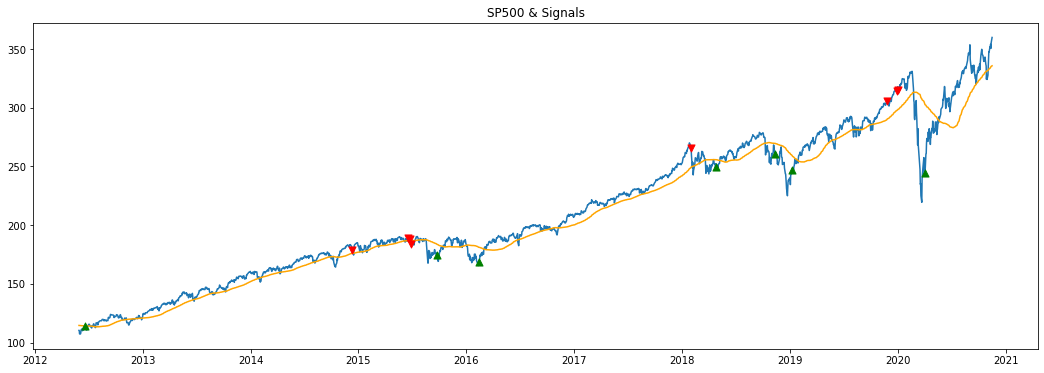

In [125]:
buy = 0.2
sell = 0.8

%matplotlib inline 

df = do_Strat(dff)

df['SELL'] = (df['Score_Rank']> sell) & (df['Score_Rank'].shift(1) > df['Score_Rank']) & (df['Score_Rank'].shift(2) < df['Score_Rank'].shift(1))
# & (df['Stock_P']>df['Stock_MA'])
df['BUY'] = (df['Score_Rank'] < buy) & (df['Score_Rank'].shift(1) < df['Score_Rank']) & (df['Score_Rank'].shift(2) > df['Score_Rank'].shift(1)) &(df['Stock_P']<df['Stock_MA'])

print("          6-Month Return")
print('')
print(f"6M Sell Return is {round(((df['6M nReturn']*df['SELL']*-1).sum()/df['SELL'].sum())*100,1)}% on average from {df['SELL'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['6M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['6M nReturn']*df['SELL']) if num != 0]),2)}")
print('')
print(f"6M Buy Return is {round(((df['6M nReturn']*df['BUY']).sum()/df['BUY'].sum())*100,1)}% on average from {df['BUY'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['6M nReturn']*df['BUY']) if num > 0.06])/len([num for num in (df['6M nReturn']*df['BUY']) if num != 0]),2)}")
print('')
print(f"The Average 6M Return is {round(df['6M nReturn'].sum()/df['6M nReturn'].count()*100, 1)}%")
print('')
plt.figure(figsize=(18, 2))
plt.bar(df['Date'], df['6M nReturn'], width=1, zorder=0)
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], '6M nReturn'].values, label='skitscat', color='red', s=40, marker="v", zorder=10)
plt.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], '6M nReturn'].values, label='skitscat', color='green', s=40, marker="^", zorder=10)
plt.title('6M Fwd Return')
plt.show()
print('          --------------------')
print('')
print("          3-Month Return")
print('')
print(f"3M Sell Return is {round(((df['3M nReturn']*df['SELL']*-1).sum()/df['SELL'].sum())*100,1)}% on average from {df['SELL'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['3M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['3M nReturn']*df['SELL']) if num != 0]),2)}")
print('')
print(f"3M Buy Return is {round(((df['3M nReturn']*df['BUY']).sum()/df['BUY'].sum())*100,1)}% on average from {df['BUY'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['3M nReturn']*df['BUY']) if num > 0.03])/len([num for num in (df['3M nReturn']*df['BUY']) if num != 0]),2)}")
print('')
print('')
print(f"The Average 3M Return is {round(df['3M nReturn'].sum()/df['3M nReturn'].count()*100, 1)}%")
print('')
plt.figure(figsize=(18, 2))
plt.bar(df['Date'], df['3M nReturn'], width=1, zorder=0)
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], '3M nReturn'].values, label='skitscat', color='red', s=40, marker="v", zorder=10)
plt.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], '3M nReturn'].values, label='skitscat', color='green', s=40, marker="^", zorder=10)
plt.title('3M Fwd Return')
plt.show()
print('          --------------------')
print('')

print("          3-Month Return")
print('')
print(f"1M Sell Return is {round(((df['1M nReturn']*df['SELL']*-1).sum()/df['SELL'].sum())*100,1)}% on average from {df['SELL'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['1M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['1M nReturn']*df['SELL']) if num != 0]),2)}")
print('')
print(f"3M Buy Return is {round(((df['1M nReturn']*df['BUY']).sum()/df['BUY'].sum())*100,1)}% on average from {df['BUY'].sum()} signals")
print(f"Hit-rate: {round(len([num for num in (df['1M nReturn']*df['BUY']) if num > 0.03])/len([num for num in (df['1M nReturn']*df['BUY']) if num != 0]),2)}")
print('')
print('')
print(f"The Average 3M Return is {round(df['1M nReturn'].sum()/df['1M nReturn'].count()*100, 1)}%")
print('')
plt.figure(figsize=(18, 2))
plt.bar(df['Date'], df['1M nReturn'], width=1, zorder=0)
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], '1M nReturn'].values, label='skitscat', color='red', s=40, marker="v", zorder=10)
plt.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], '1M nReturn'].values, label='skitscat', color='green', s=40, marker="^", zorder=10)
plt.title('1M Fwd Return')
plt.show()
print('          --------------------')
print('')


plt.figure(figsize=(18, 2))
plt.plot(df['Date'], df['Score_Rank'], zorder=10)
plt.axhline(y=buy, color='g', linestyle='-', zorder=0)
plt.axhline(y=sell, color='r', linestyle='-', zorder=0)
plt.title('G Index')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Stock_P'], zorder=0)
plt.plot(df['Date'], df['Stock_MA'], color='orange', zorder=0)
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], 'Stock_P'].values, label='skitscat', color='red', s=50, marker="v", zorder=10)
plt.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], 'Stock_P'].values, label='skitscat', color='green', s=50, marker="^", zorder=10)
plt.title('SP500 & Signals')
plt.show()

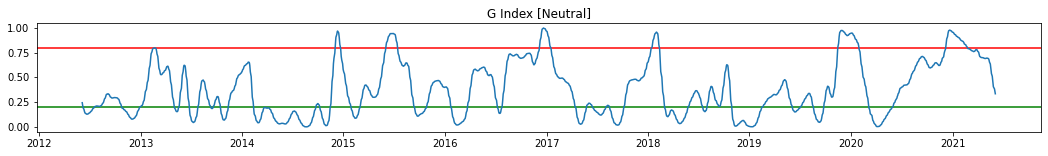

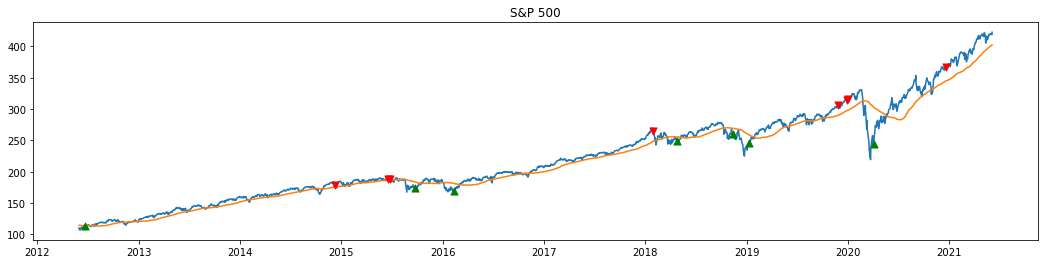

In [126]:

df = do_Strat(dff, evaluate=False)

sentiment = {0.0:'Starke Angst', 0.2:'Angst', 0.4:'Neutral', 0.6:'Euphorie', 0.8:'Starke Euphorie'}

buy=0.2
sell=0.8

df['SELL'] = (df['Score_Rank']> sell) & (df['Score_Rank'].shift(1) > df['Score_Rank']) & (df['Score_Rank'].shift(2) < df['Score_Rank'].shift(1))& (df['Stock_P']>df['Stock_MA'])
df['BUY'] = (df['Score_Rank'] < buy) & (df['Score_Rank'].shift(1) < df['Score_Rank']) & (df['Score_Rank'].shift(2) > df['Score_Rank'].shift(1)) &(df['Stock_P']<df['Stock_MA'])

df.dropna(subset=['Score_Rank'], inplace=True)

plt.figure(figsize=(18, 2))
plt.plot(df['Date'], MA(df['Score_Rank'],5), zorder=10)
plt.axhline(y=buy, color='g', linestyle='-', zorder=0)
plt.axhline(y=sell, color='r', linestyle='-', zorder=0)
plt.title(f"G Index [{sentiment[round(df['Score_Rank'].iloc[-1]*5)/5]}]")
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(df['Date'], df['Stock_P'])
plt.plot(df['Date'], df['Stock_MA'])
plt.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], 'Stock_P'].values, label='skitscat', color='red', s=50, marker="v", zorder=10)
plt.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], 'Stock_P'].values, label='skitscat', color='green', s=50, marker="^", zorder=10)
plt.title('S&P 500')
plt.show()

In [109]:
choose = 4
options = ['SB_Ratio_Rank', 'Risk_Premium_Rank', 'Vola_Slope_Rank', 'SPX_Impl_Spread_P-C_Rank', 'High_Low_Rank', 'SEKJPY_Rank', 'Score_Rank']

res = pd.DataFrame(columns=['n', 'hr6', 'hr3', 'r6', 'r3', '2016'])

for aaa in range(40, 480):
    df = do_Strat(dff, n1=int(aaa), n2=int(aaa), n3=int(aaa), n4=int(aaa), n5=int(aaa), n6=int(aaa), n7=int(aaa))
    df[options[choose]]
    df['SELL'] = (df[options[choose]]< 0.9) & (df[options[choose]].shift(1)> 0.9)
    df['BUY'] = (df[options[choose]] > 0.1) & (df[options[choose]].shift(1) < 0.1)
    hr6 = round(len([num for num in (df['6M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['6M nReturn']*df['SELL']) if num != 0]),2)
    hr3 = round(len([num for num in (df['3M nReturn']*df['SELL']) if num < 0])/len([num for num in (df['3M nReturn']*df['SELL']) if num != 0]),2)
    r6 = ((df['6M nReturn']*df['SELL']*-1).sum())/(df['SELL'].sum())
    r3 = ((df['3M nReturn']*df['SELL']*-1).sum())/(df['SELL'].sum())
    o = ((df['SELL'][100:600].sum()>0).astype(int))+((df['SELL'][900:1200].sum()>0).astype(int))+((df['SELL'][1900:2150].sum()>0).astype(int))+((df['SELL'][2500:3100].sum()>0).astype(int))+((df['SELL'][3300:3500].sum()>0).astype(int))
    to_append = [aaa,hr6,hr3,r6,r3, o]
    a_series = pd.Series(to_append, index = res.columns)
    res = res.append(a_series, ignore_index=True)

res['Score4'] = ((res['hr6']+res['hr3'])*(res["2016"]))
res['Score1'] = res['r6']+res['r3']
res['Score2'] = res['hr6']*res['hr3']
res['Score3'] = res['Score1']+res['Score2']
res.sort_values(by=['Score1'], ascending=False, inplace=True)
print(options[choose])
print(res.iloc[0:5])
res.sort_values(by=['Score4'], ascending=False, inplace=True)
print(res.iloc[0:5])
res.sort_values(by=['Score3'], ascending=False, inplace=True)
print(res.iloc[0:5])

High_Low_Rank
       n   hr6   hr3        r6        r3  2016  Score4    Score1  Score2  \
51  91.0  0.18  0.35  0.002030 -0.014528   3.0    1.59 -0.012498  0.0630   
32  72.0  0.25  0.44  0.001701 -0.014430   3.0    2.07 -0.012729  0.1100   
33  73.0  0.19  0.38  0.006253 -0.020967   3.0    1.71 -0.014714  0.0722   
55  95.0  0.17  0.33 -0.002983 -0.017269   3.0    1.50 -0.020252  0.0561   
54  94.0  0.17  0.33 -0.003895 -0.017776   3.0    1.50 -0.021671  0.0561   

      Score3  
51  0.050502  
32  0.097271  
33  0.057486  
55  0.035848  
54  0.034429  
         n   hr6   hr3        r6        r3  2016  Score4    Score1  Score2  \
319  359.0  0.33  0.40 -0.034876  0.007656   5.0    3.65 -0.027220  0.1320   
316  356.0  0.33  0.40 -0.034876  0.007656   5.0    3.65 -0.027220  0.1320   
317  357.0  0.33  0.40 -0.034876  0.007656   5.0    3.65 -0.027220  0.1320   
318  358.0  0.33  0.40 -0.034876  0.007656   5.0    3.65 -0.027220  0.1320   
320  360.0  0.31  0.38 -0.039328  0.004292   5.0 

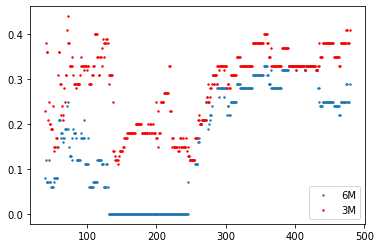

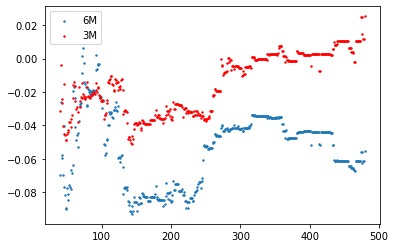

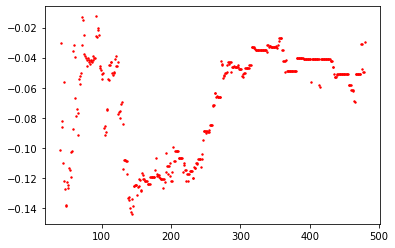

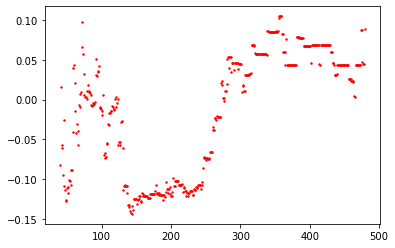

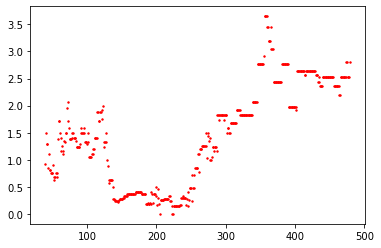

In [110]:
plt.scatter(res['n'], res['hr6'], label='6M',  s=2)
plt.scatter(res['n'], res['hr3'], color='r', label='3M', s=2)
plt.legend()
plt.show()

plt.scatter(res['n'], res['r6'], label='6M',  s=2)
plt.scatter(res['n'], res['r3'], color='r', label='3M', s=2)
plt.legend()
plt.show()

plt.scatter(res['n'], res['Score1'], color='r', label='3M', s=2)
plt.show()

plt.scatter(res['n'], res['Score3'], color='r', label='3M', s=2)
plt.show()

plt.scatter(res['n'], res['Score4'], color='r', label='3M', s=2)
plt.show()

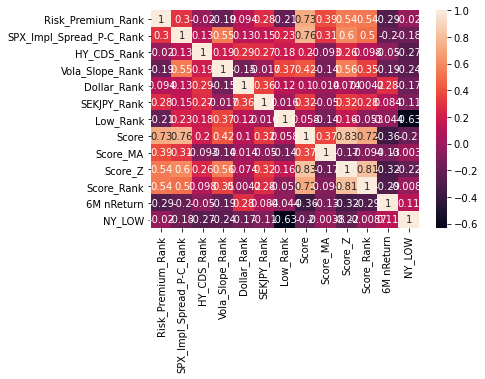

In [68]:
df = do_Strat(dff)
df_new = df[[ 'Risk_Premium_Rank', 'SPX_Impl_Spread_P-C_Rank',
       'HY_CDS_Rank', 'Vola_Slope_Rank', 'Dollar_Rank', 'SEKJPY_Rank', 'Low_Rank', 'Score', 'Score_MA', 'Score_Z',
       'Score_Rank', '6M nReturn', 'NY_LOW']]

corrMatrix = df_new.corr()

sn.heatmap(corrMatrix, annot=True)

plt.show()

In [342]:
import statsmodels.api as sm
df = do_Strat(dff)

slr_model = sm.OLS(df['6M nReturn'], df[[ 'Risk_Premium', 'Vola_Slope', 'Dollar ', 'SB_Ratio', 'HY_CDS', 'Low_Rank', 'SEKJPY']])
slr_reg = slr_model.fit()
print(slr_reg.summary())

# 'SB_Ratio', 'SPX_Impl_Spread_P-C',

                                 OLS Regression Results                                
Dep. Variable:             6M nReturn   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              395.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                        0.00
Time:                        12:53:09   Log-Likelihood:                          2624.3
No. Observations:                1784   AIC:                                     -5235.
Df Residuals:                    1777   BIC:                                     -5196.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [37]:
df.columns

Index(['Date', 'Fwd_Earnings', 'Stock_P', 'Stock_Vol', 'US10Y_Yield',
       'Put_Call', 'SPX_P', 'Bond_P', 'Earnings', 'Stock_Volume',
       'SPX_Impl_Spread_P-C', 'Dollar ', 'Vola_Slope', 'HY_CDS', 'SEKJPY',
       'NY_HIGH', 'NY_LOW', '1M nReturn', '3M nReturn', '6M nReturn',
       'Stock_MA', 'Stock_r', 'Bond_r', 'SB_Ratio', 'SB_Ratio_Rank',
       'Risk_Premium', 'Risk_Premium_Rank', 'SPX_Impl_Spread_P-C_Rank',
       'HY_CDS_Rank', 'Vola_Slope_Rank', 'Dollar_Rank', 'SEKJPY_Rank',
       'High_Low', 'High_Low_Rank', 'Score', 'Score_MA', 'Score_Z',
       'Score_Rank'],
      dtype='object')

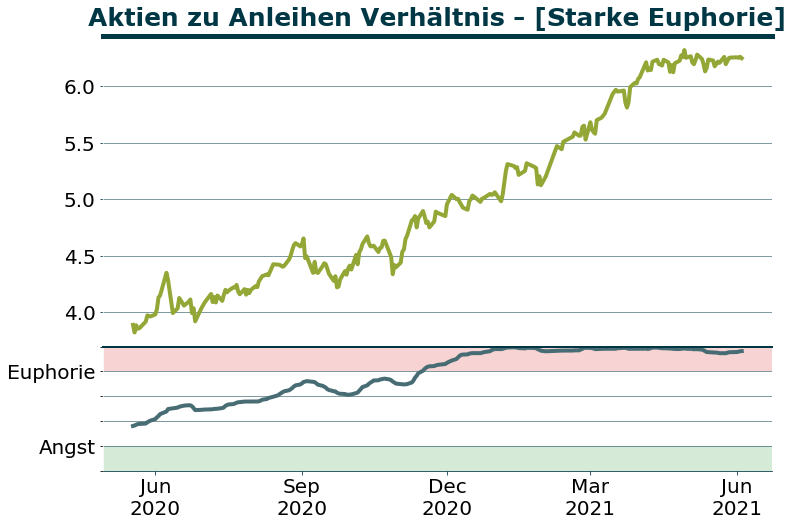

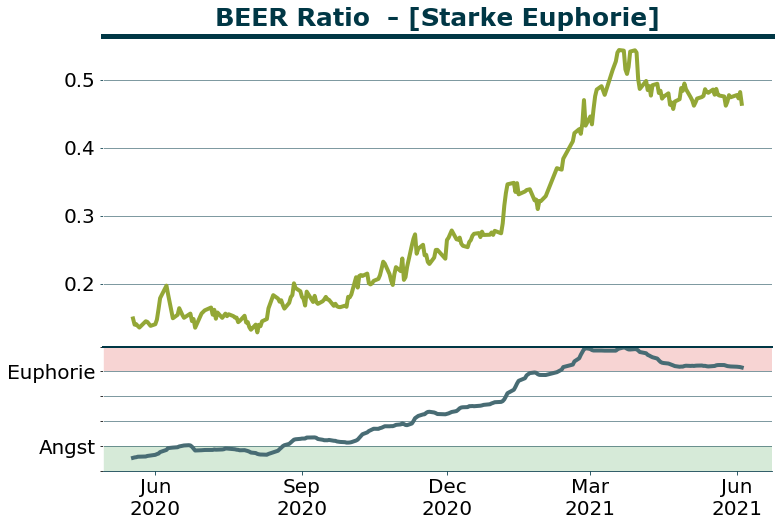

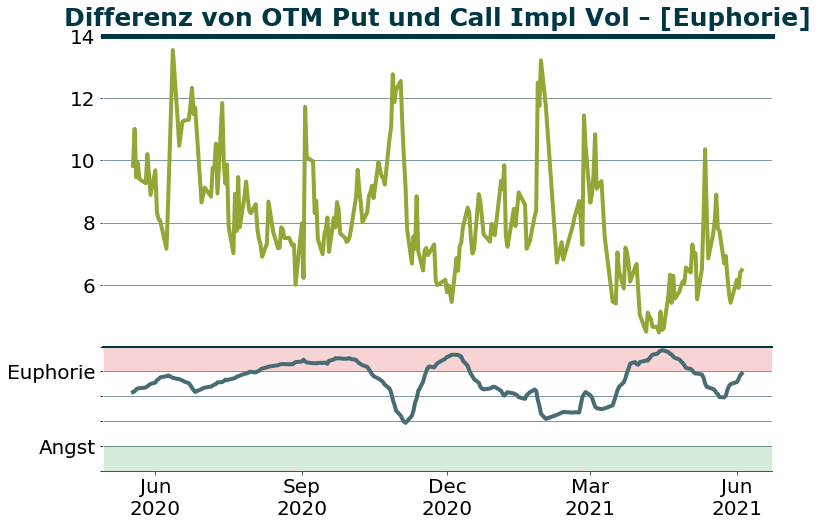

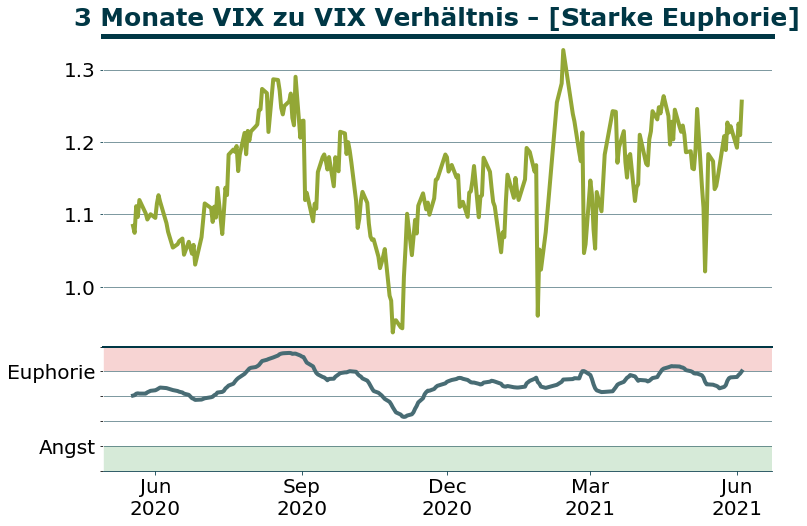

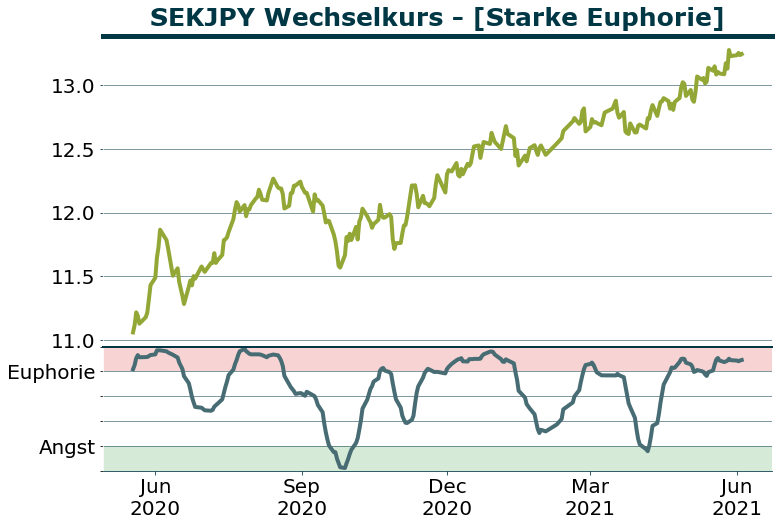

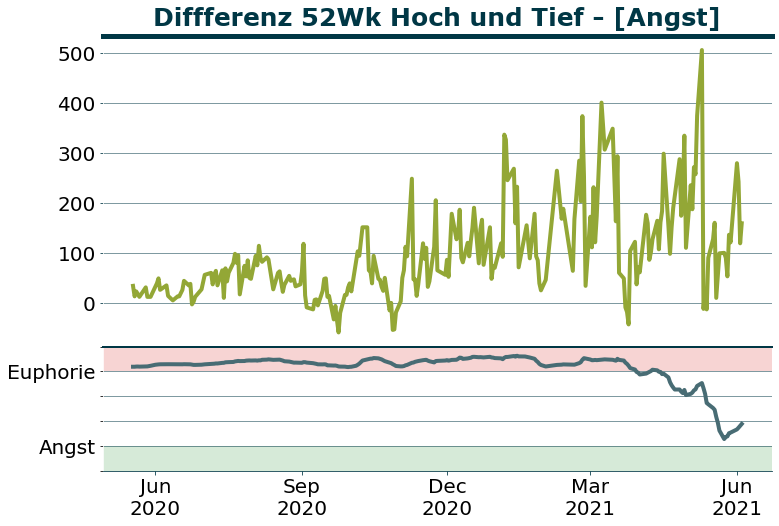

In [379]:
for i in range(6):

    choose = i

    df = do_Strat(dff, evaluate=False)

    options1 = [df['SB_Ratio'], df['Risk_Premium'], df['SPX_Impl_Spread_P-C'], df['Vola_Slope'], df['SEKJPY'], df['High-Low']]
    options2 = ['SB_Ratio_Rank', 'Risk_Premium_Rank', 'SPX_Impl_Spread_P-C_Rank', 'Vola_Slope_Rank', 'SEKJPY_Rank', 'High_Low_Rank' ]
    options3 = ['Aktien zu Anleihen Verhältnis', 'BEER Ratio ','Differenz von OTM Put und Call Impl Vol', '3 Monate VIX zu VIX Verhältnis', 'SEKJPY Wechselkurs', 'Diffferenz 52Wk Hoch und Tief']

    fig = plt.figure(figsize=(12,8), constrained_layout=True)
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 
    fig.patch.set_facecolor('w')

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1], sharex=ax0)

    majorLocator = MultipleLocator(20)

    ax0.plot(df['Date'][-240:], options1[choose][-240:], linewidth = 4, color ='#93a736')
    ax0.set_title(f"{options3[choose]} - [{sentiment[int(df[options2[choose]].iloc[-1]*5)/5]}]", fontsize=25, color='#003745', fontweight='bold', fontname="Verdana", pad=10)
    ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax0.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')
    ax0.get_xaxis().set_visible(False)
    ax0.spines['bottom'].set_color('w')
    ax0.spines['top'].set_color('#003745')
    ax0.spines['top'].set_linewidth(5)
    ax0.spines['left'].set_color('w')
    ax0.spines['right'].set_color('w')
    ax0.tick_params(axis='y', labelsize=20, color='#003745')




    ax1.plot(df['Date'][-240:], df[options2[choose]][-240:]*100, linewidth = 4, color ='#486c74')
    ax1.spines['bottom'].set_color('#003745')
    ax1.spines['top'].set_color('#003745')
    ax1.spines['top'].set_linewidth(2)
    ax1.spines['left'].set_color('w')
    ax1.spines['right'].set_color('w')

    ax1.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')

    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax1.tick_params(axis='x', labelsize=20, color='#003745')
    ax1.axhspan(100*buy, 100*(buy-buy), facecolor='#7ABC81', alpha=0.3)
    ax1.axhspan(100*sell, 100*(sell+buy), facecolor='#E77270', alpha=0.3)

    ax1.set_ylim((0,100))
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.set_yticklabels(['','','Angst','', '', 'Euphorie'], ha="right", fontname="Verdana",)
    ax1.tick_params(axis='y', labelsize=20)


    plt.subplots_adjust(hspace=.0)

    plt.savefig(options3[choose], dpi=500, facecolor = 'w')

    plt.show()

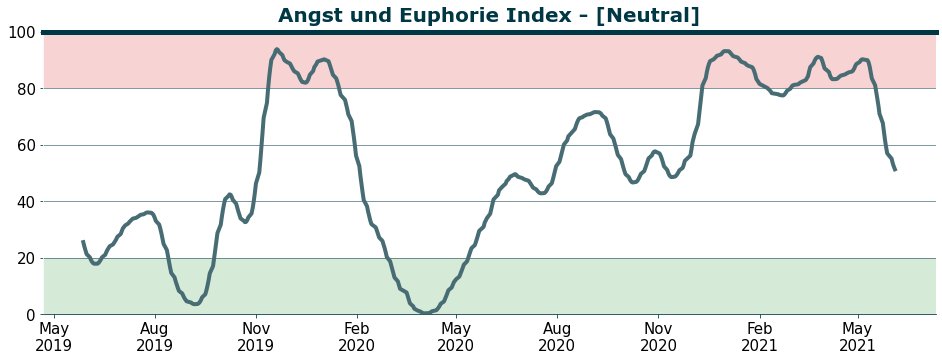

In [380]:
buy = 0.2
sell = 0.8

sentiment = {0.0:'Starke Angst', 0.2:'Angst', 0.4:'Neutral', 0.6:'Euphorie', 0.8:'Starke Euphorie'}

%matplotlib inline 

df = do_Strat(dff, evaluate=False)

fig = plt.figure(figsize=(16,8), constrained_layout=True)
fig.patch.set_facecolor('w')

ax0 = plt.subplot(gs[0])

majorLocator = MultipleLocator(20)

ax0.plot(df['Date'][-480:], 100*df['Score_Rank'][-480:], linewidth = 4, color ='#486c74')
ax0.set_title(f"Angst und Euphorie Index - [{sentiment[int(df['Score_Rank'].iloc[-1]*5)/5]}]", fontsize=20, color='#003745', fontweight='bold', fontname="Verdana", pad=10)

ax0.spines['bottom'].set_color('#003745')
ax0.spines['top'].set_color('#003745')
ax0.spines['top'].set_linewidth(5)
ax0.spines['left'].set_color('w')
ax0.spines['right'].set_color('w')

ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax0.tick_params(axis='x', labelsize=15, color='#003745')
ax0.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')
ax0.tick_params(axis='y', labelsize=15, color='#003745')
ax0.axhspan(100*buy, 100*(buy-buy), facecolor='#7ABC81', alpha=0.3)
ax0.axhspan(100*sell, 100*(sell+buy), facecolor='#E77270', alpha=0.3)
ax0.set_ylim((0,100))
ax0.yaxis.set_major_locator(majorLocator)

plt.savefig('G Index', dpi=500, facecolor = 'w')

plt.show()

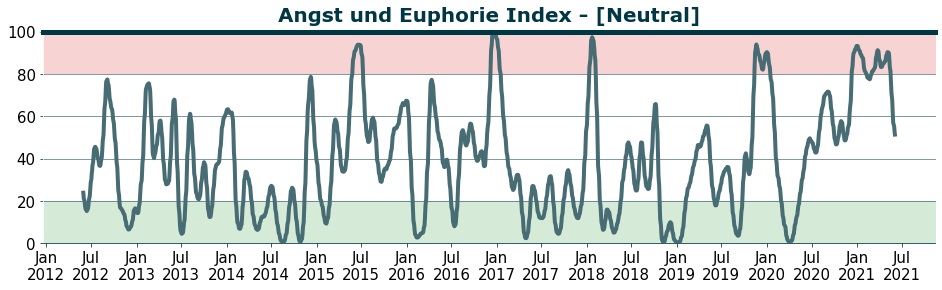

In [381]:
buy = 0.2
sell = 0.8

sentiment = {0.0:'Starke Angst', 0.2:'Angst', 0.4:'Neutral', 0.6:'Euphorie', 0.8:'Starke Euphorie'}

%matplotlib inline 

df = do_Strat(dff, evaluate=False)

fig = plt.figure(figsize=(16,6), constrained_layout=True)
fig.patch.set_facecolor('w')

ax0 = plt.subplot(gs[0])

majorLocator = MultipleLocator(20)

ax0.plot(df['Date'], 100*df['Score_Rank'], linewidth = 4, color ='#486c74')
ax0.set_title(f"Angst und Euphorie Index - [{sentiment[int(df['Score_Rank'].iloc[-1]*5)/5]}]", fontsize=20, color='#003745', fontweight='bold', fontname="Verdana", pad=10)

ax0.spines['bottom'].set_color('#003745')
ax0.spines['top'].set_color('#003745')
ax0.spines['top'].set_linewidth(5)
ax0.spines['left'].set_color('w')
ax0.spines['right'].set_color('w')

ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax0.tick_params(axis='x', labelsize=15, color='#003745')
ax0.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')
ax0.tick_params(axis='y', labelsize=15, color='#003745')
ax0.axhspan(100*buy, 100*(buy-buy), facecolor='#7ABC81', alpha=0.3)
ax0.axhspan(100*sell, 100, facecolor='#E77270', alpha=0.3)
ax0.set_ylim((0,100))
ax0.yaxis.set_major_locator(majorLocator)

plt.savefig('G Index Long', dpi=500, facecolor = 'w')

plt.show()

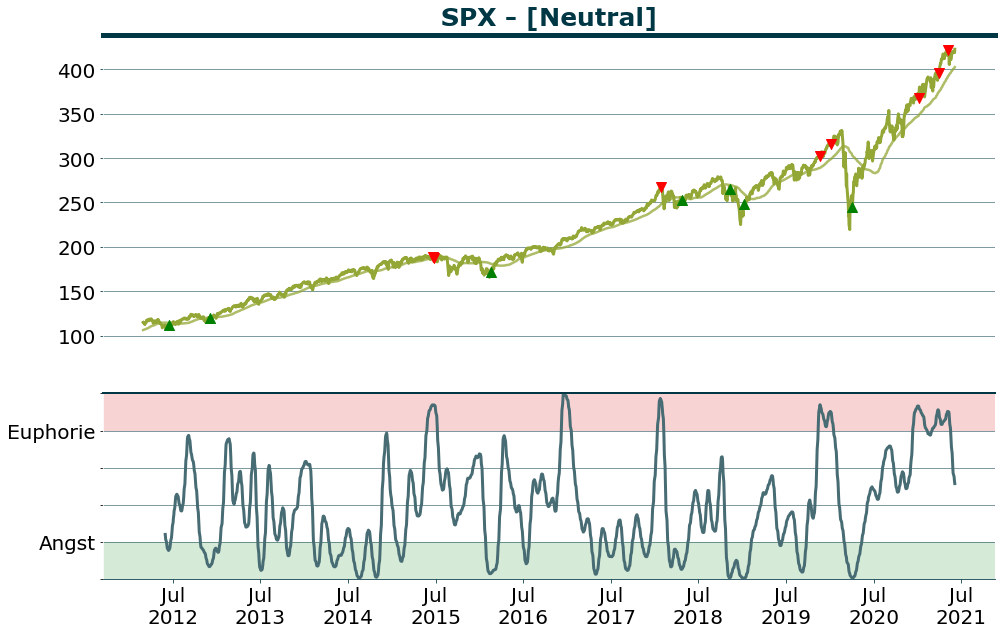

In [399]:
df = do_Strat(dff, evaluate=False)

buy=0.2
sell=0.8

df['SELL'] = (df['Score_Rank']> sell) & (df['Score_Rank'].shift(1) > df['Score_Rank']) & (df['Score_Rank'].shift(2) < df['Score_Rank'].shift(1))& (df['Stock_P']>df['Stock_MA'])
df['BUY'] = (df['Score_Rank'] < buy) & (df['Score_Rank'].shift(1) < df['Score_Rank']) & (df['Score_Rank'].shift(2) > df['Score_Rank'].shift(1)) &(df['Stock_P']<df['Stock_MA'])

fig = plt.figure(figsize=(16,10), constrained_layout=True)
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 3]) 
fig.patch.set_facecolor('w')

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

majorLocator = MultipleLocator(20)

ax0.plot(df['Date'][-2300:], df['Stock_P'][-2300:], linewidth = 3, color ='#93a736')
ax0.plot(df['Date'][-2300:], df['Stock_MA'][-2300:], linewidth = 2.5, color ='#93a736', alpha =0.75)
ax0.scatter(df.loc[df['SELL'], 'Date'].values, df.loc[df['SELL'], 'Stock_P'].values, label='skitscat', color='red', s=100, marker="v", zorder=10)
ax0.scatter(df.loc[df['BUY'], 'Date'].values, df.loc[df['BUY'], 'Stock_P'].values, label='skitscat', color='green', s=100, marker="^", zorder=10)
ax0.set_title(f"SPX - [{sentiment[int(df['Score_Rank'].iloc[-1]*5)/5]}]", fontsize=25, color='#003745', fontweight='bold', fontname="Verdana", pad=10)
ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax0.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')
ax0.get_xaxis().set_visible(False)
ax0.spines['bottom'].set_color('w')
ax0.spines['top'].set_color('#003745')
ax0.spines['top'].set_linewidth(5)
ax0.spines['left'].set_color('w')
ax0.spines['right'].set_color('w')
ax0.tick_params(axis='y', labelsize=20, color='#003745')

ax1.plot(df['Date'][-2300:], df['Score_Rank'][-2300:]*100, linewidth = 3, color ='#486c74')
ax1.spines['bottom'].set_color('#003745')
ax1.spines['top'].set_color('#003745')
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')

ax1.grid(linewidth = 0.5, axis='y', color = '#003745', linestyle = '-')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax1.tick_params(axis='x', labelsize=20, color='#003745')
ax1.axhspan(100*buy, 100*(buy-buy), facecolor='#7ABC81', alpha=0.3)
ax1.axhspan(100*sell, 100*(sell+buy), facecolor='#E77270', alpha=0.3)

ax1.set_ylim((0,100))
ax1.yaxis.set_major_locator(majorLocator)
ax1.set_yticklabels(['','','Angst','', '', 'Euphorie'], ha="right", fontname="Verdana",)
ax1.tick_params(axis='y', labelsize=20)

plt.savefig('G Index Long', dpi=500, facecolor = 'w')

plt.show()

In [240]:
df[-120:-60]

,Date,SPX_P,Earnings,VIX_CALL,VIX_PUT,SPX_Impl_Spread_P-C,Stock_P,VIX,VVIX_CALL,VVIX_PUT,...,SEKJPY_Rank,High_Low,Low_Rank,High_Rank,High-Low,High_Low_Rank,Score,Score_MA,Score_Z,Score_Rank
2850,2020-12-04,3699.12,128.49,14.53,19.28,4.75,367.078,20.79,134.18,86.39,...,0.907089,180.000000,1.000000,0.707510,179.0,0.889323,4.399401,3.481403,0.950050,0.666494
2851,2020-12-07,3691.96,128.48,14.11,19.08,4.97,366.324,21.30,144.56,91.39,...,0.930239,43.666667,0.844976,0.513834,128.0,0.895953,4.435939,3.479085,0.993295,0.685298
2852,2020-12-08,3702.25,128.49,13.66,17.43,3.77,367.396,20.68,137.77,84.05,...,0.942867,138.000000,1.000000,0.541502,137.0,0.902442,4.464585,3.476895,1.028327,0.703972
2853,2020-12-09,3672.82,128.49,14.67,19.90,5.23,364.101,22.27,155.96,98.53,...,0.942677,94.500000,0.902191,0.743083,187.0,0.907606,4.478518,3.475196,1.046926,0.721083
2854,2020-12-10,3668.10,128.49,14.12,19.43,5.31,363.981,22.52,164.79,99.43,...,0.935864,31.333333,0.844976,0.367589,91.0,0.899581,4.442813,3.473700,1.013121,0.736399
2855,2020-12-11,3663.46,128.49,14.07,20.57,6.50,363.555,23.31,194.38,116.27,...,0.922772,28.333333,0.844976,0.332016,82.0,0.900698,4.401919,3.472340,0.973370,0.749821
2856,2020-12-14,3647.49,128.48,18.17,24.11,5.94,361.927,24.72,247.38,164.17,...,0.930707,41.333333,0.844976,0.486166,121.0,0.904536,4.380181,3.471083,0.953315,0.761657
2857,2020-12-15,3694.62,128.48,16.40,21.19,4.79,366.820,22.89,126.00,114.15,...,0.946172,32.333333,0.844976,0.379447,94.0,0.907118,4.388072,3.470453,0.962913,0.773164
2858,2020-12-16,3701.17,128.48,16.63,20.92,4.29,367.396,22.50,135.95,90.10,...,0.946112,42.666667,0.844976,0.501976,125.0,0.909770,4.372278,3.470028,0.947210,0.785141
2859,2020-12-17,3722.48,128.48,16.92,19.76,2.84,369.450,21.93,135.00,87.85,...,0.946112,26.166667,0.747167,0.616601,151.0,0.916609,4.384837,3.469926,0.960603,0.797010


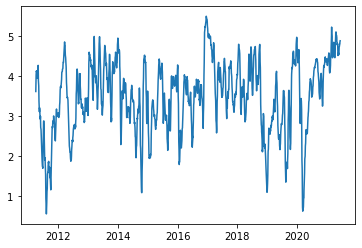

In [232]:
plt.plot(df['Date'], df['Score'])

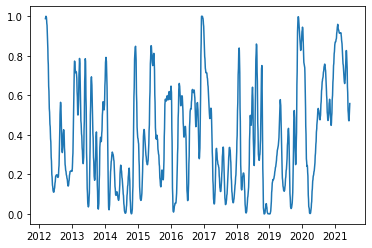

In [233]:
plt.plot(df['Date'], df['Score_Rank'])

In [246]:
df[(df['US10Y_Yield']==df['US10Y_Yield'][-300:].min())]

,Date,SPX_P,Earnings,VIX_CALL,VIX_PUT,SPX_Impl_Spread_P-C,Stock_P,VIX,VVIX_CALL,VVIX_PUT,...,SEKJPY_Rank,High_Low,Low_Rank,High_Rank,High-Low,High_Low_Rank,Score,Score_MA,Score_Z,Score_Rank
2762,2020-08-04,3306.51,130.76,15.64,21.98,6.34,326.28,23.76,145.6,93.36,...,0.97018,20.0,0.804382,0.337607,76.0,0.886756,4.210001,3.356214,0.80649,0.642337


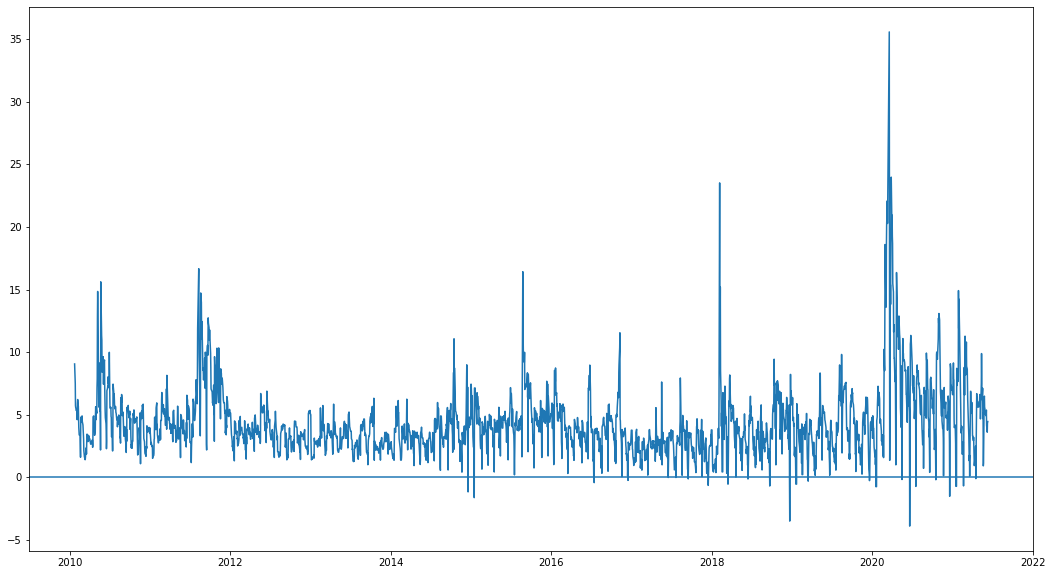

In [261]:
plt.subplots(figsize=(18,10))
plt.plot(df['Date'], df['SPX_Impl_Spread_P-C'])
plt.axhline(y=0)
plt.show()

In [386]:
df['SELL'].tail(60)

2915    False
2916    False
2918    False
2921    False
2923    False
2924    False
2925    False
2926    False
2927    False
2928    False
2929    False
2930    False
2931     True
2932    False
2933    False
2934    False
2936    False
2937    False
2938    False
2939    False
2940    False
2941    False
2942    False
2943    False
2944    False
2945    False
2946    False
2947    False
2948    False
2949    False
2950    False
2951    False
2952    False
2953    False
2954    False
2955    False
2956    False
2957    False
2958    False
2959    False
2960     True
2961    False
2962    False
2963    False
2964    False
2965    False
2966    False
2967    False
2968    False
2969    False
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2977    False
2978    False
2979    False
2980    False
Name: SELL, dtype: bool

In [390]:
df.tail(60)

,Date,SPX_P,Earnings,VIX_CALL,VIX_PUT,SPX_Impl_Spread_P-C,Stock_P,VIX,VVIX_CALL,VVIX_PUT,...,Low_Rank,High_Rank,High-Low,High_Low_Rank,Score,Score_MA,Score_Z,Score_Rank,SELL,BUY
2915,2021-03-05,3841.94,123.99,16.78,25.65,9.0923,382.378,24.66,181.84,105.97,...,0.600209,0.508021,174.0,0.890533,4.782340,3.631260,1.122534,0.813131,False,False
2916,2021-03-08,3821.35,123.99,18.90,27.55,9.3376,380.474,25.47,193.35,110.39,...,0.844976,1.000000,401.0,0.893952,4.740894,3.637592,1.073692,0.814853,False,False
2918,2021-03-10,3898.81,123.94,15.69,21.92,7.5415,388.308,22.56,146.52,80.70,...,0.902191,0.764268,307.0,0.896765,4.751863,3.643276,1.076340,0.821062,False,False
2921,2021-03-15,3968.94,123.94,14.51,17.87,5.4637,395.116,20.03,133.01,100.82,...,1.000000,0.866005,349.0,0.893484,4.776680,3.648633,1.092535,0.830305,False,False
2923,2021-03-17,3974.12,123.94,14.74,16.07,5.4035,395.963,19.23,140.74,80.18,...,0.902191,0.409429,164.0,0.886234,4.880177,3.654254,1.183860,0.843556,False,False
2924,2021-03-18,3915.46,123.94,21.36,23.14,7.0485,390.202,21.58,149.95,89.00,...,0.902191,0.732010,294.0,0.901242,4.985753,3.660334,1.275600,0.860965,False,False
2925,2021-03-19,3913.10,123.94,10.70,10.80,6.4355,389.480,20.95,149.66,86.48,...,0.902191,0.153846,61.0,0.892692,5.008715,3.666670,1.287172,0.875610,False,False
2926,2021-03-22,3940.59,123.09,12.44,18.07,5.8850,392.590,18.88,145.73,79.06,...,0.706573,0.141439,50.0,0.887363,5.052341,3.673817,1.317605,0.888810,False,False
2927,2021-03-23,3910.52,123.09,13.05,19.92,7.1999,389.500,20.30,149.34,88.11,...,0.502400,0.062035,-8.0,0.870673,5.008343,3.681698,1.264505,0.898328,False,False
2928,2021-03-24,3889.14,123.09,13.64,20.52,7.0266,387.520,21.20,145.18,88.17,...,0.462847,0.066998,-17.0,0.860475,4.982627,3.690479,1.229235,0.905645,False,False


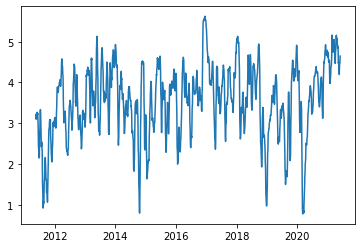

In [400]:
plt.plot(df['Date'], df['Score'])

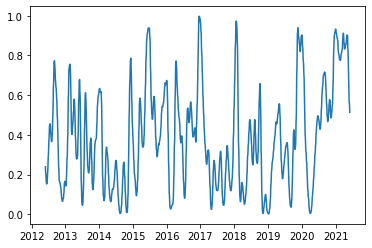

In [401]:
plt.plot(df['Date'], df['Score_Rank'])

In [45]:
v = 1650
df[v:v+60]

,Date,SPX_P,Earnings,VIX_CALL,VIX_PUT,SPX_Impl_Spread_P-C,Stock_P,VIX,VVIX_CALL,VVIX_PUT,...,High_Low_Rank_0,High_Low_Rank_1,High_Low_Rank_2,High_Low_Rank,Score,Score_MA,Score_Z,Score_Rank,SELL,BUY
2384,2019-02-21,2774.88,150.46,10.36,14.34,4.0079,266.401,14.46,92.90,63.49,...,0.793431,0.793431,0.929150,0.824496,3.066581,3.201753,-0.168306,0.218686,False,False
2385,2019-02-22,2792.67,150.46,9.57,13.05,3.6384,268.053,13.51,92.17,60.85,...,0.844425,0.844425,0.988866,0.836768,3.122620,3.200597,-0.097101,0.225357,False,False
2386,2019-02-25,2796.11,150.46,10.46,14.14,3.9383,268.418,14.85,100.87,65.34,...,0.834054,0.834054,0.976721,0.844883,3.167368,3.199578,-0.040115,0.232469,False,False
2387,2019-02-26,2793.90,150.48,10.49,14.51,4.0658,268.226,15.17,100.78,69.35,...,0.774417,0.774417,0.906883,0.843696,3.191155,3.198527,-0.009183,0.239982,False,False
2388,2019-02-27,2792.38,150.44,9.90,13.75,4.0124,268.111,14.70,100.83,67.95,...,0.796959,0.770095,0.901822,0.843038,3.206213,3.197325,0.011075,0.247316,False,False
2389,2019-02-28,2784.49,150.27,9.84,14.06,4.3155,267.611,14.78,101.06,70.96,...,0.811270,0.783924,0.918016,0.844589,3.223459,3.195765,0.034526,0.254558,False,False
2390,2019-03-01,2803.69,150.12,8.81,11.83,3.6793,269.282,13.57,98.93,66.45,...,0.823792,0.796024,0.932186,0.848895,3.293947,3.194185,0.124460,0.262318,False,False
2391,2019-03-04,2792.81,150.13,9.73,14.18,5.2335,268.303,14.63,115.57,76.55,...,0.811270,0.783924,0.918016,0.847522,3.290008,3.192612,0.121595,0.269673,False,False
2392,2019-03-05,2789.65,150.13,9.71,13.96,4.8857,267.938,14.74,114.82,75.89,...,0.779070,0.752809,0.881579,0.842825,3.296912,3.191161,0.132109,0.276851,False,False
2393,2019-03-06,2771.45,150.13,11.09,15.38,5.4122,266.315,15.74,118.61,86.39,...,0.755814,0.730337,0.855263,0.836548,3.272116,3.189681,0.103044,0.282960,False,False
